In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as snb

from sklearn import datasets  
from sklearn.model_selection import train_test_split 
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report


In [11]:
fraud=pd.read_csv("C:\\Users\\deepa\\Downloads\\Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [12]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [13]:
fraud[fraud.duplicated(keep= False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


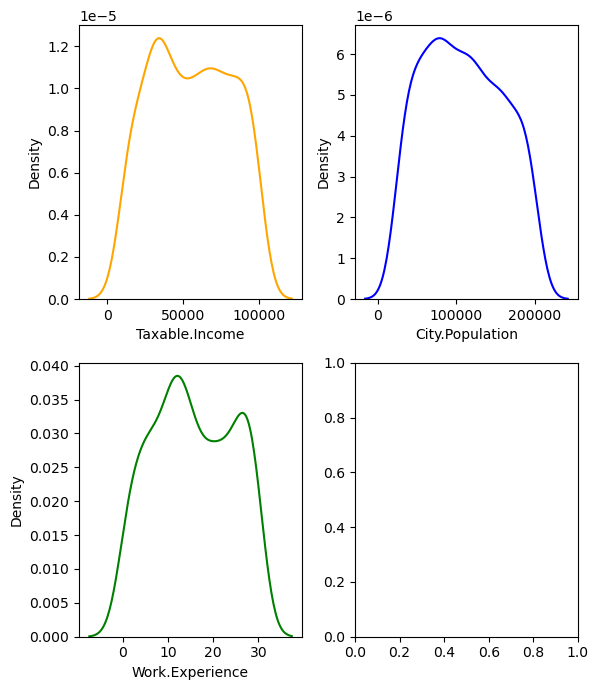

In [14]:
# checking  the given dataset is normally distributed or not
fig, ax = plt.subplots(2, 2, figsize=(6,7))
snb.kdeplot(fraud["Taxable.Income"],ax=ax[0,0],color='orange')
snb.kdeplot(fraud["City.Population"], ax=ax[0,1],color='b')
snb.kdeplot(fraud["Work.Experience"],ax=ax[1,0],color='g')
plt.tight_layout()
plt.show()

In [18]:
# Label encoding- For categorical variables
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])

In [19]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [20]:
# Classifying data based on the income greater than 30,000 and less than 30,000  subjected to taxation
fraud["Taxable.Income"]=(fraud["Taxable.Income"]>30000)*1

In [21]:
# Dropping the target variable from the dataset for modelling
x=fraud.drop(axis=1,columns="Taxable.Income")
y=fraud["Taxable.Income"]

In [22]:
# splitting the data for training and testing
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [23]:
# Build decision tree classifier-  based on gini index classifying the data is in risky or good taxable income
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

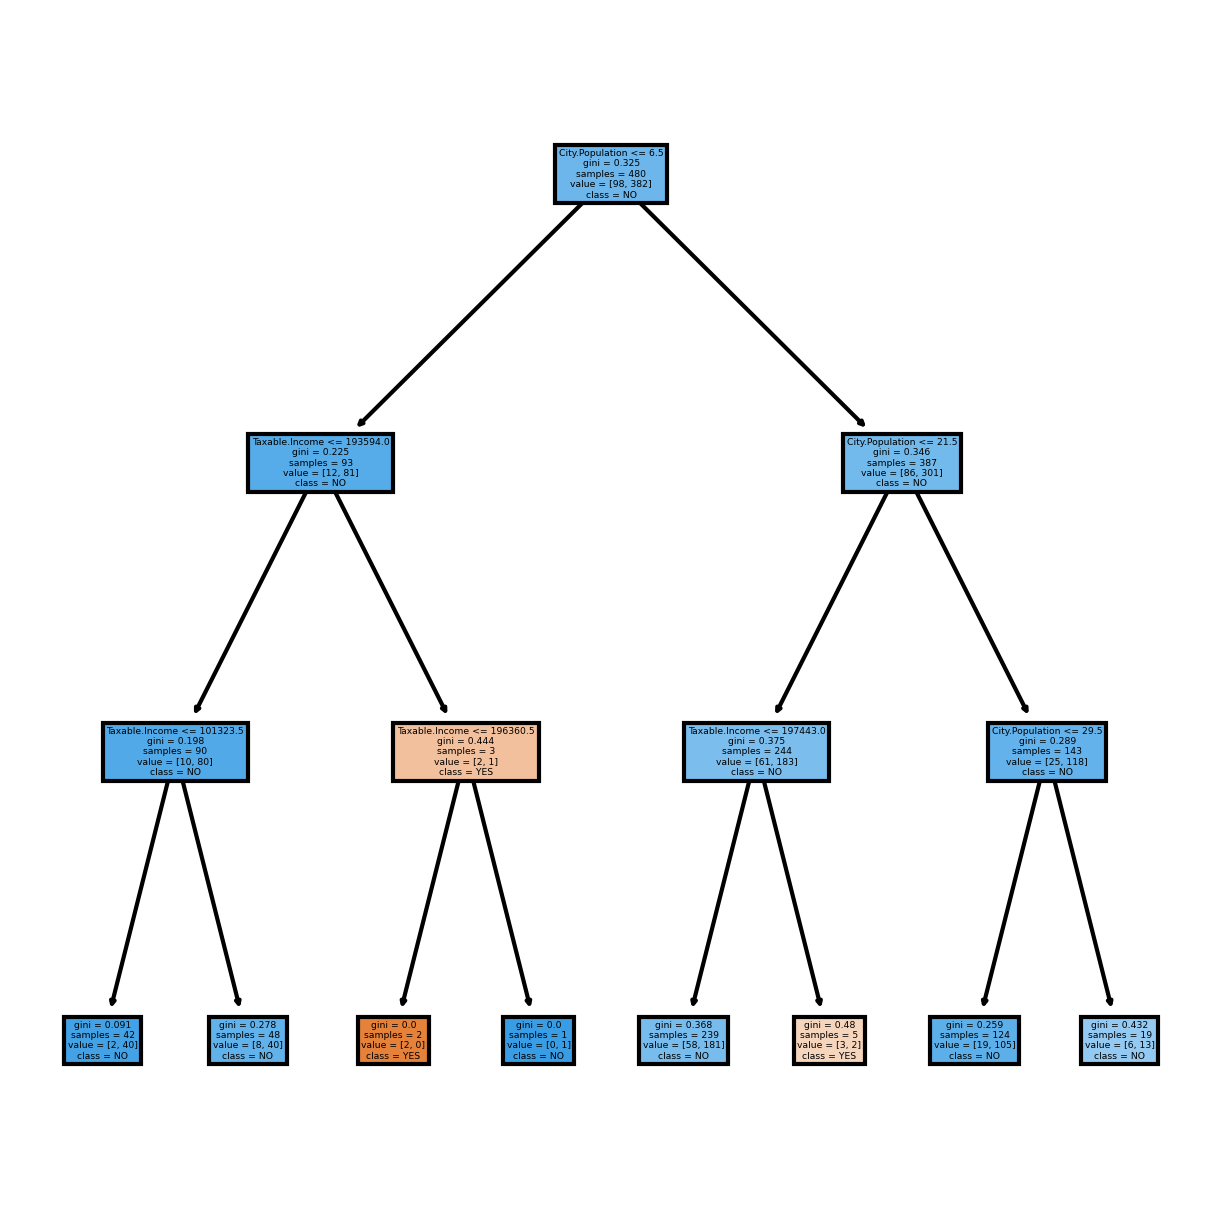

In [24]:
# Visualizing the decision tree
fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience"]
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True); 

In [25]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8020833333333334

In [26]:
model.score(x_test, y_test)

0.7833333333333333

In [27]:
model.feature_importances_

array([0.        , 0.        , 0.44832281, 0.55167719, 0.        ])

In [28]:
# Predicting with test data
y_pred = model.predict(x_test)
y_pred
('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.7833333333333333)

In [29]:
model.predict([[0,1,1,1,0]])

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [30]:
 #Predict the probabilities of each of the predicted classes to show how much it is risky or good
model.predict_proba(x_test)

array([[0.15322581, 0.84677419],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.16666667, 0.83333333],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.31578947, 0.68421053],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.04761905, 0.95238095],
       [0.24267782, 0.75732218],
       [0.31578947, 0.68421053],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.

In [31]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[ 0, 26],
       [ 0, 94]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7833333333333333')

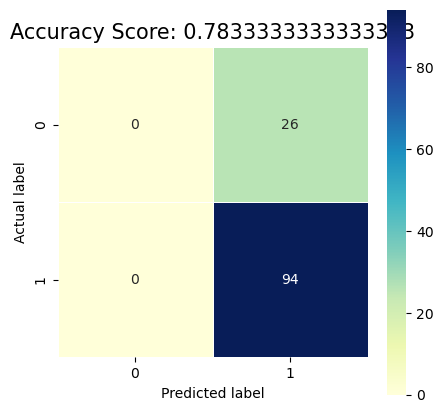

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,cmap="YlGnBu")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [33]:
#  Classification report  for test data and predicted data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



C:\Users\deepa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#  Looping function to check the accuracy with max_depth ranging from 1 to 11
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [35]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.795833,0.783333
1,2,0.795833,0.783333
2,3,0.797917,0.783333
3,4,0.800000,0.783333
4,5,0.802083,0.775000
5,6,0.806250,0.775000
6,7,0.810417,0.766667
7,8,0.818750,0.741667
8,9,0.833333,0.750000
9,10,0.845833,0.750000


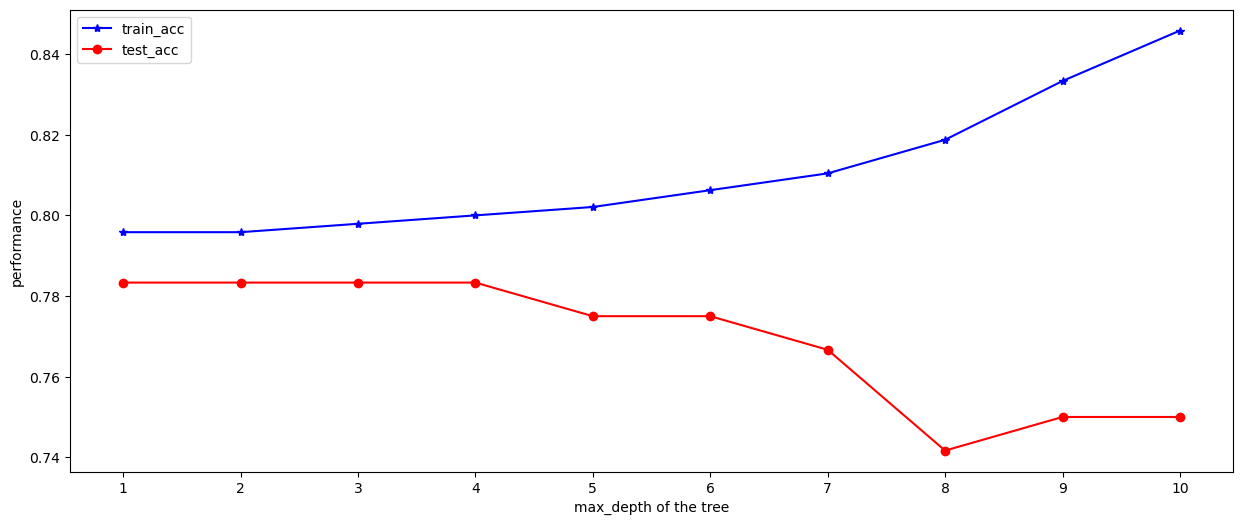

In [36]:
# visualization of accuracy using train and test data
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'], marker = '*',color='blue')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = 'o',color='red')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

In [ ]:
#From the range of 1 to 5 of maximum depth it shows the accuracy in between 78 to 80% .
 